In [63]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
dados = pd.read_csv('dados\clientes.csv', sep= ';')
dados

,Id,Idade,Sexo,Estado Civil,Sinistros,Prêmio,Categoria,Desconto
0,1,64,M,viuvo,0.0,774.464232,Sênior,697.017809
1,2,34,F,divorciado,7.0,1411.800897,Adulto,1411.800897
2,3,84,F,divorciado,2.0,803.922742,Sênior,803.922742
3,4,42,F,casado,2.0,1142.005576,Adulto,1142.005576
4,5,20,M,casado,NaN,940.051137,Jovem,940.051137
...,...,...,...,...,...,...,...,...
9995,9996,79,F,casado,NaN,975.383433,Sênior,975.383433
9996,9997,65,F,divorciado,0.0,1143.553683,Sênior,1029.198314
9997,9998,18,M,casado,1.0,1028.185036,Jovem,1028.185036
9998,9999,104,F,viuvo,2.0,813.078427,Sênior,813.078427


In [65]:
#Informações de cada coluna e o tamanho da base de dados
dados.info()
len(dados)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            10000 non-null  int64  
 1   Idade         10000 non-null  int64  
 2   Sexo          10000 non-null  object 
 3   Estado Civil  10000 non-null  object 
 4   Sinistros     8949 non-null   float64
 5   Prêmio        10000 non-null  float64
 6   Categoria     10000 non-null  object 
 7   Desconto      10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


10000

In [66]:
dados.Sinistros.fillna(0, inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            10000 non-null  int64  
 1   Idade         10000 non-null  int64  
 2   Sexo          10000 non-null  object 
 3   Estado Civil  10000 non-null  object 
 4   Sinistros     10000 non-null  float64
 5   Prêmio        10000 non-null  float64
 6   Categoria     10000 non-null  object 
 7   Desconto      10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [67]:
dados=dados.round({'Prêmio':2,'Desconto':2})

In [68]:
dados.drop(['Desconto'], axis=1, inplace=True)

In [85]:
dados = dados.sort_values(by='Idade').reset_index(drop=True)
dados.head(10)

,Id,Idade,Sexo,Estado Civil,Sinistros,Prêmio,Categoria
0,8550,18,F,viuvo,7.0,1096.77,Jovem
1,3664,18,F,solteiro,2.0,895.74,Jovem
2,9098,18,M,divorciado,3.0,725.64,Jovem
3,24,18,F,viuvo,2.0,1159.80,Jovem
4,1182,18,F,casado,2.0,1190.48,Jovem
5,3753,18,M,divorciado,1.0,999.51,Jovem
6,352,18,M,divorciado,4.0,705.36,Jovem
7,4816,18,F,viuvo,5.0,753.44,Jovem
8,5132,18,M,divorciado,1.0,1154.19,Jovem
9,9699,18,M,viuvo,6.0,1081.77,Jovem


In [70]:
dados_1 = dados.groupby(['Sexo'], as_index=False)[['Prêmio']].mean().round(2)
dados_1

,Sexo,Prêmio
0,F,1003.48
1,M,994.84


In [71]:
dados_2 = dados.groupby(['Categoria'], as_index=False)[['Categoria']].size().rename(columns={'size': 'Quantidade'}).sort_values(by='Quantidade')
dados_2

,Categoria,Quantidade
1,Jovem,1412
0,Adulto,1602
2,Sênior,6986


Text(0.5, 1.0, 'Sinistros')

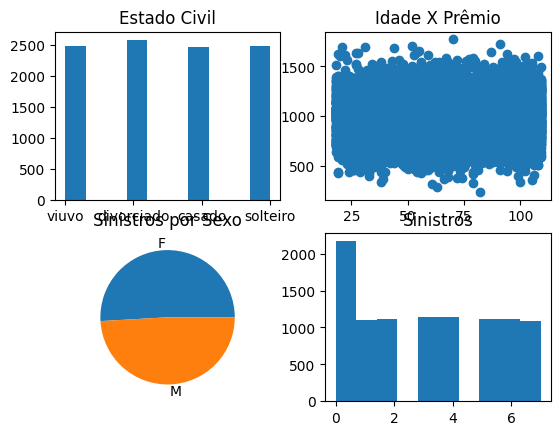

In [84]:
area = plt.figure() 
g1 = area.add_subplot(2, 2, 1)
g1.hist(dados['Estado Civil'])
g1.set_title('Estado Civil')

g2 = area.add_subplot(2, 2, 2)
g2.scatter(dados.Idade, dados.Prêmio)
g2.set_title('Idade X Prêmio')

g3 = area.add_subplot(2, 2, 3)
dados_g3 = dados.groupby(['Sexo'], as_index=False)[['Sinistros']].sum().round(2)
g3.pie(dados_g3.Sinistros, labels= dados_g3.Sexo)
g3.set_title('Sinistros por Sexo')


g4 = area.add_subplot(2, 2, 4)
g4.hist(dados['Sinistros'])
g4.set_title('Sinistros')



